In [1]:
# Requisitos 

import re
import pandas as pd
import pickle 

In [2]:
# Abrir base de datos a Dataframe

final = pd.read_csv('database_descrip.csv')

In [3]:
final

,Title,Link,Type,Number,Month,Day,Year,Date,Description
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,1,5,2016,2016-01-05,Por el cual se efectúa un nombramiento
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,1,5,2016,2016-01-05,Por el cual se modifica la planta de personal ...
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,1,5,2016,2016-01-05,Por el cual se modifica la estructura del Depa...
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,1,5,2016,2016-01-05,Por el cual se sustituye el Título 4 de la Par...
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,1,5,2016,2016-01-05,Por el cual se crea una bonificación para los ...
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,1,5,2016,2016-01-05,Por el cual se modifica la remuneración de los...
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,1,6,2016,2016-01-06,Por el cual se establece la remuneración de lo...
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,1,8,2016,2016-01-08,Por el cual se modifica la remuneración de los...
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,1,12,2016,2016-01-12,Por el cual se retira del servicio activo a un...
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,1,12,2016,2016-01-12,Por el cual se hace un nombramiento ordinario


# Análisis de la base de datos

In [4]:
# Requisitos parte 2

import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import string


In [5]:
# Total de Normativas

len(final)

3706

In [9]:
# Concatenate all speeches in one string

total_reg = final['Description'].str.cat(sep=',')

In [10]:
punctuation = string.punctuation + "–¡¿”“•\r´''``,.()-«_:"
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´\'\'``,.()-«_:'

In [11]:
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [13]:
final['no_punct'] = final['Description'].apply(no_punct)

In [14]:
# Strip punctuation from string

descrip_nopunct = no_punct(total_reg)

In [15]:
# Lowercase

total_reg = descrip_nopunct.lower()

In [16]:
len(total_reg)

449440

In [17]:
# Tokenize text

all_tokens = word_tokenize(total_reg)

In [18]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('de', 6832),
 ('el', 5003),
 ('se', 4359),
 ('cual', 3591),
 ('la', 3267),
 ('del', 3036),
 ('y', 2056),
 ('en', 1769),
 ('un', 1739),
 ('hace', 1040),
 ('decreto', 903),
 ('para', 793),
 ('a', 766),
 ('una', 682),
 ('ministerio', 682),
 ('planta', 669),
 ('nombramiento', 619),
 ('relaciones', 586),
 ('exteriorespor', 529),
 ('los', 527),
 ('modifica', 439),
 ('2', 397),
 ('designa', 385),
 ('las', 350),
 ('al', 347),
 ('2015', 339),
 ('personal', 337),
 ('medio', 329),
 ('dictan', 321),
 ('único', 319),
 ('reglamentario', 313),
 ('sector', 292),
 ('otras', 272),
 ('artículo', 270),
 ('con', 269),
 ('parte', 266),
 ('por', 263),
 ('efectúa', 260),
 ('adiciona', 258),
 ('libro', 253),
 ('nacional', 248),
 ('título', 243),
 ('acepta', 239),
 ('externa', 222),
 ('disposicionespor', 221),
 ('departamento', 217),
 ('renuncia', 208),
 ('designación', 207),
 ('república', 205),
 ('1', 203),
 ('comercio', 202),
 ('traslado', 197),
 ('ley', 183),
 ('junta', 181),
 ('miembro', 179),
 ('directi

In [19]:
# From inspection of frequency distribution, make list of words of interest

relevant = ["modifica","adiciona","dictan","reglamenta","establece","dictan"]
not_relevant = ["nombramiento","designa","acepta","traslado","reconocimiento","prorroga","efectúa"]

of_interest =["nombramiento","modifica","designa","adiciona","acepta","traslado","reconocimiento","prorroga",
             "efectúa","dictan","reglamenta","establece",]

In [20]:
# Filter list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [21]:
# Join list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [22]:
fdist = nltk.FreqDist(tokens_of_interest)

In [23]:
fdist.most_common()

[('nombramiento', 619),
 ('modifica', 439),
 ('designa', 385),
 ('dictan', 321),
 ('efectúa', 260),
 ('adiciona', 258),
 ('acepta', 239),
 ('traslado', 197),
 ('reglamenta', 76),
 ('establece', 71),
 ('reconocimiento', 39),
 ('prorroga', 38)]

In [24]:
final

,Title,Link,Type,Number,Month,Day,Year,Date,Description,no_punct
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,1,5,2016,2016-01-05,Por el cual se efectúa un nombramiento,Por el cual se efectúa un nombramiento
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,1,5,2016,2016-01-05,Por el cual se modifica la planta de personal ...,Por el cual se modifica la planta de personal ...
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,1,5,2016,2016-01-05,Por el cual se modifica la estructura del Depa...,Por el cual se modifica la estructura del Depa...
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,1,5,2016,2016-01-05,Por el cual se sustituye el Título 4 de la Par...,Por el cual se sustituye el Título 4 de la Par...
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,1,5,2016,2016-01-05,Por el cual se crea una bonificación para los ...,Por el cual se crea una bonificación para los ...
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,1,5,2016,2016-01-05,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,1,6,2016,2016-01-06,Por el cual se establece la remuneración de lo...,Por el cual se establece la remuneración de lo...
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,1,8,2016,2016-01-08,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,1,12,2016,2016-01-12,Por el cual se retira del servicio activo a un...,Por el cual se retira del servicio activo a un...
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,1,12,2016,2016-01-12,Por el cual se hace un nombramiento ordinario,Por el cual se hace un nombramiento ordinario


In [25]:
# Add column with speech column tokenized

final['tokens'] = final['Description'].apply(word_tokenize)

In [26]:
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')

In [27]:
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [28]:
# Add column with speech column tokenized

final['no_stopwords'] = final['tokens'].apply(no_stopwords)

In [29]:
# Add column with nltk.Text object

final['nltk_Text'] = final['no_stopwords'].apply(nltk.Text)

In [30]:
final

,Title,Link,Type,Number,Month,Day,Year,Date,Description,no_punct,tokens,no_stopwords,nltk_Text
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,1,5,2016,2016-01-05,Por el cual se efectúa un nombramiento,Por el cual se efectúa un nombramiento,"[Por, el, cual, se, efectúa, un, nombramiento]","[Por, efectúa, nombramiento]","(Por, efectúa, nombramiento)"
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,1,5,2016,2016-01-05,Por el cual se modifica la planta de personal ...,Por el cual se modifica la planta de personal ...,"[Por, el, cual, se, modifica, la, planta, de, ...","[Por, modifica, planta, personal, Departamento...","(Por, modifica, planta, personal, Departamento..."
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,1,5,2016,2016-01-05,Por el cual se modifica la estructura del Depa...,Por el cual se modifica la estructura del Depa...,"[Por, el, cual, se, modifica, la, estructura, ...","[Por, modifica, estructura, Departamento, Admi...","(Por, modifica, estructura, Departamento, Admi..."
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,1,5,2016,2016-01-05,Por el cual se sustituye el Título 4 de la Par...,Por el cual se sustituye el Título 4 de la Par...,"[Por, el, cual, se, sustituye, el, Título, 4, ...","[Por, sustituye, Título, 4, Parte, 1, Libro, 2...","(Por, sustituye, Título, 4, Parte, 1, Libro, 2..."
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,1,5,2016,2016-01-05,Por el cual se crea una bonificación para los ...,Por el cual se crea una bonificación para los ...,"[Por, el, cual, se, crea, una, bonificación, p...","[Por, crea, bonificación, servidores, públicos...","(Por, crea, bonificación, servidores, públicos..."
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,1,5,2016,2016-01-05,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...,"[Por, el, cual, se, modifica, la, remuneración...","[Por, modifica, remuneración, servidores, públ...","(Por, modifica, remuneración, servidores, públ..."
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,1,6,2016,2016-01-06,Por el cual se establece la remuneración de lo...,Por el cual se establece la remuneración de lo...,"[Por, el, cual, se, establece, la, remuneració...","[Por, establece, remuneración, servidores, púb...","(Por, establece, remuneración, servidores, púb..."
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,1,8,2016,2016-01-08,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...,"[Por, el, cual, se, modifica, la, remuneración...","[Por, modifica, remuneración, servidores, públ...","(Por, modifica, remuneración, servidores, públ..."
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,1,12,2016,2016-01-12,Por el cual se retira del servicio activo a un...,Por el cual se retira del servicio activo a un...,"[Por, el, cual, se, retira, del, servicio, act...","[Por, retira, servicio, activo, Oficial, Gener...","(Por, retira, servicio, activo, Oficial, Gener..."
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,1,12,2016,2016-01-12,Por el cual se hace un nombramiento ordinario,Por el cual se hace un nombramiento ordinario,"[Por, el, cual, se, hace, un, nombramiento, or...","[Por, hace, nombramiento, ordinario]","(Por, hace, nombramiento, ordinario)"


In [31]:
del final["no_stopwords"]

In [32]:
final

,Title,Link,Type,Number,Month,Day,Year,Date,Description,no_punct,tokens,nltk_Text
0,DECRETO 03 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,3,1,5,2016,2016-01-05,Por el cual se efectúa un nombramiento,Por el cual se efectúa un nombramiento,"[Por, el, cual, se, efectúa, un, nombramiento]","(Por, efectúa, nombramiento)"
1,DECRETO 04 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,4,1,5,2016,2016-01-05,Por el cual se modifica la planta de personal ...,Por el cual se modifica la planta de personal ...,"[Por, el, cual, se, modifica, la, planta, de, ...","(Por, modifica, planta, personal, Departamento..."
2,DECRETO 07 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,7,1,5,2016,2016-01-05,Por el cual se modifica la estructura del Depa...,Por el cual se modifica la estructura del Depa...,"[Por, el, cual, se, modifica, la, estructura, ...","(Por, modifica, estructura, Departamento, Admi..."
3,DECRETO 08 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,8,1,5,2016,2016-01-05,Por el cual se sustituye el Título 4 de la Par...,Por el cual se sustituye el Título 4 de la Par...,"[Por, el, cual, se, sustituye, el, Título, 4, ...","(Por, sustituye, Título, 4, Parte, 1, Libro, 2..."
4,DECRETO 09 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,9,1,5,2016,2016-01-05,Por el cual se crea una bonificación para los ...,Por el cual se crea una bonificación para los ...,"[Por, el, cual, se, crea, una, bonificación, p...","(Por, crea, bonificación, servidores, públicos..."
5,DECRETO 06 DEL 05 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,6,1,5,2016,2016-01-05,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...,"[Por, el, cual, se, modifica, la, remuneración...","(Por, modifica, remuneración, servidores, públ..."
6,DECRETO 13 DEL 06 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,13,1,6,2016,2016-01-06,Por el cual se establece la remuneración de lo...,Por el cual se establece la remuneración de lo...,"[Por, el, cual, se, establece, la, remuneració...","(Por, establece, remuneración, servidores, púb..."
7,DECRETO 17 DEL 08 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,17,1,8,2016,2016-01-08,Por el cual se modifica la remuneración de los...,Por el cual se modifica la remuneración de los...,"[Por, el, cual, se, modifica, la, remuneración...","(Por, modifica, remuneración, servidores, públ..."
8,DECRETO 38 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,38,1,12,2016,2016-01-12,Por el cual se retira del servicio activo a un...,Por el cual se retira del servicio activo a un...,"[Por, el, cual, se, retira, del, servicio, act...","(Por, retira, servicio, activo, Oficial, Gener..."
9,DECRETO 35 DEL 12 DE ENERO DE 2016,https://dapre.presidencia.gov.co/normativa/nor...,DECRETO,35,1,12,2016,2016-01-12,Por el cual se hace un nombramiento ordinario,Por el cual se hace un nombramiento ordinario,"[Por, el, cual, se, hace, un, nombramiento, or...","(Por, hace, nombramiento, ordinario)"


In [35]:
# Función de porcentaje de aparición de palarba

def percent(word,text):
    fdist = nltk.FreqDist(text)
    w = fdist [word]
    l = len(text)
    word_percentage = 100 * w / l
    print(str(word_percentage)+ "%")

In [37]:
percent("nombramiento",all_tokens)

0.8356733988551679%


In [38]:
percent("modifica",all_tokens)

0.5926665946646507%


In [58]:
all_regulations = nltk.Text(all_tokens)
all_regulations

<Text: por el cual se efectúa un nombramientopor el...>

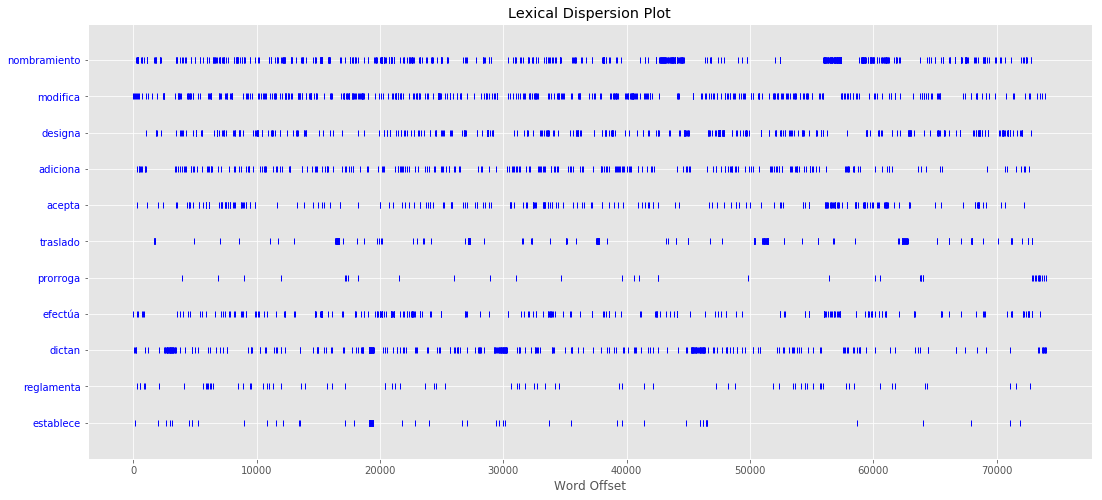

In [62]:
all_regulations.dispersion_plot(["nombramiento","modifica","designa","adiciona","acepta","traslado",
                                 "prorroga","efectúa","dictan","reglamenta","establece"])